In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [16]:
### Importing the data
df = pd.read_csv("E:/Freelance Projects/Coding with Jupeter Notebook for Data Science assignment/10. Random Forests/Fraud_check.csv")

In [17]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [12]:
#### Preparing the Fraud Columns as Risky whose taxable income is >=30000 and Good for Others

In [18]:
df['Status'] = np.where(df['Taxable.Income']<=30000, "Risky","Good")

In [7]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [19]:
df['Undergrad'].unique()

array(['NO', 'YES'], dtype=object)

In [20]:
df['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [21]:
df['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
lb = LabelEncoder()

In [24]:
df['Undergrad'] = lb.fit_transform(df['Undergrad'])
df['Urban'] = lb.fit_transform(df['Urban'])
df['Marital.Status'] = lb.fit_transform(df['Marital.Status'])

In [39]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [13]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'Status'],
      dtype='object')

In [31]:
X = df[['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population','Work.Experience', 'Urban']]  
X

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


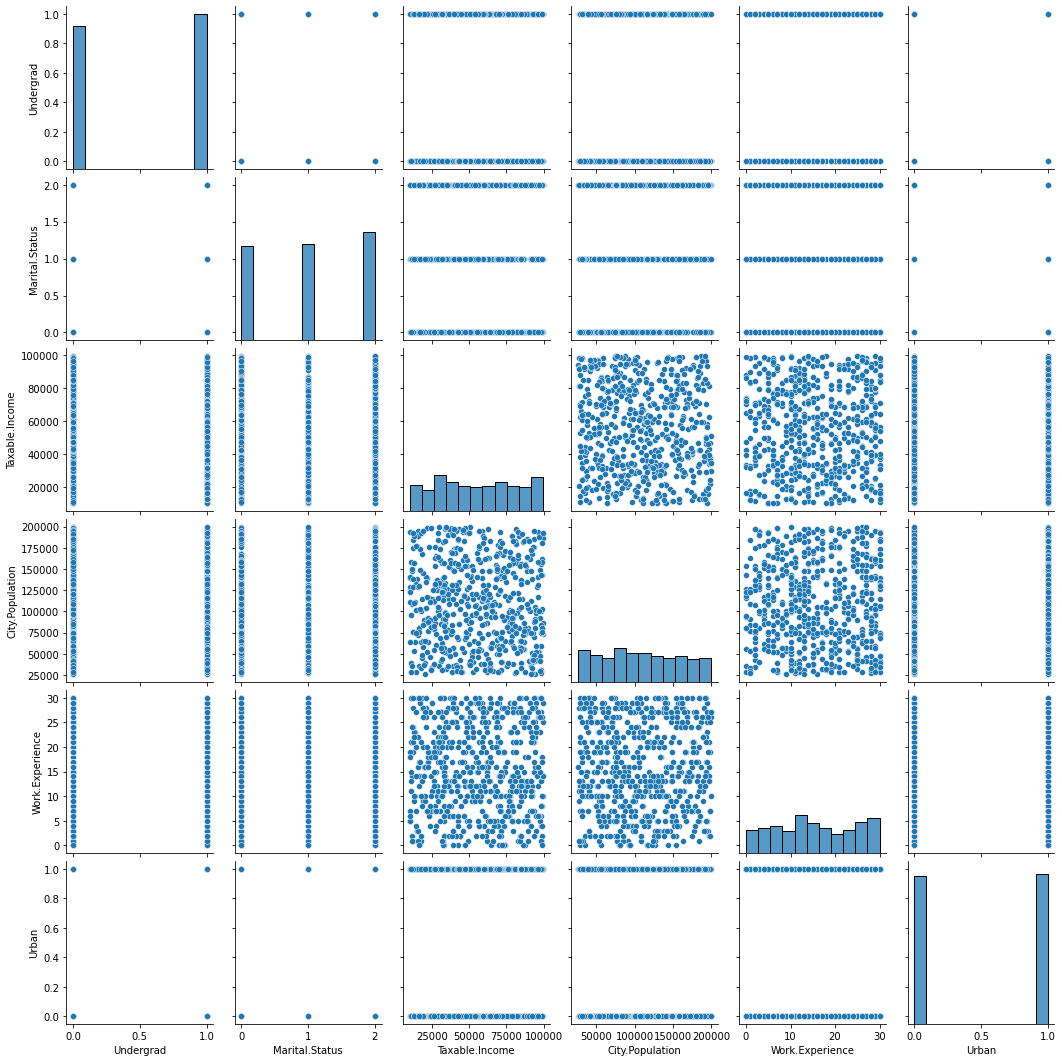

In [58]:
sns.pairplot(X)

<AxesSubplot:xlabel='Taxable.Income', ylabel='Work.Experience'>

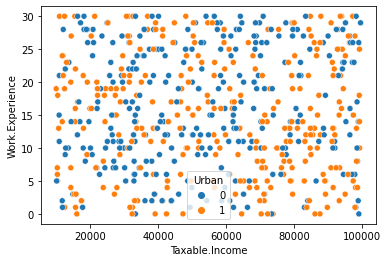

In [32]:
sns.scatterplot(x = 'Taxable.Income',y = 'Work.Experience',data = X, hue = 'Urban')

In [33]:
y = df['Status']
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Status, Length: 600, dtype: object

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
model = RandomForestClassifier()
model_train = model.fit(X_train,y_train)
print("The model training is completed")
print("The accuracy of the model is ", round(model_train.score(X_train,y_train)*100,2), "%")

The model training is completed
The accuracy of the model is  100.0 %


In [36]:
predictions = model.predict(X_test)
predictions

array(['Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Good',
       'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good',

In [37]:
accuracy_score(y_test,predictions)

1.0

In [50]:
result = confusion_matrix(y_test,predictions,labels=model_train.classes_)

In [53]:
print(result)

[[94  0]
 [ 0 26]]


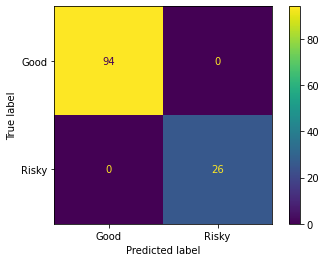

In [57]:
disp = ConfusionMatrixDisplay(confusion_matrix=result,display_labels=model_train.classes_)
disp.plot()
plt.show()

In [38]:
model = RandomForestClassifier()
model_train = model.fit(X,y)
print("The model training is completed")
print("The accuracy of the model is ", round(model_train.score(X_train,y_train)*100,2), "%")

The model training is completed
The accuracy of the model is  100.0 %
